In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
from sklearn.datasets import load_breast_cancer

In [42]:
bcd=load_breast_cancer()

In [43]:
x=bcd.data
y=bcd.target
bcd_df=pd.DataFrame(x,columns=bcd.feature_names)

In [44]:
bcd_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,shuffle=True)

c:\users\admin\pycharmprojects\pythonproject4\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


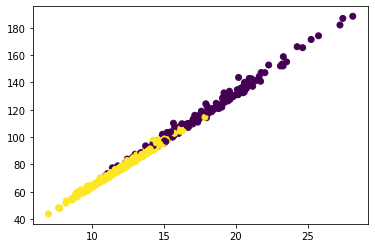

In [48]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
plt.scatter(bcd_df['mean radius'],bcd_df['mean perimeter'],c=y)

In [49]:
y_pred=logreg.predict(x_test)
logreg.score(x_test,y_test)

0.9415204678362573

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 60,   5],
       [  5, 101]], dtype=int64)

In [52]:
confusion_matrix(y_train,logreg.predict(x_train))

array([[134,  13],
       [  7, 244]], dtype=int64)

In [53]:
from sklearn.preprocessing import normalize

In [54]:
cm=normalize(cm)
cm

array([[0.99654576, 0.08304548],
       [0.0494444 , 0.99877688]])

In [55]:
cm=pd.DataFrame(cm,index=bcd.target_names,columns=bcd.target_names)
cm

,malignant,benign
malignant,0.996546,0.083045
benign,0.049444,0.998777


In [56]:
from sklearn.metrics import roc_curve

In [57]:
y_p_proba=logreg.predict_proba(x_test)
y_p_proba

array([[1.56577498e-01, 8.43422502e-01],
       [4.67583494e-02, 9.53241651e-01],
       [9.61066305e-03, 9.90389337e-01],
       [9.99999957e-01, 4.27904550e-08],
       [8.96597555e-01, 1.03402445e-01],
       [2.93742597e-03, 9.97062574e-01],
       [1.60332245e-01, 8.39667755e-01],
       [9.99999998e-01, 1.93274056e-09],
       [4.41579359e-04, 9.99558421e-01],
       [3.61282233e-02, 9.63871777e-01],
       [1.59237547e-02, 9.84076245e-01],
       [9.91595969e-01, 8.40403082e-03],
       [6.08866366e-03, 9.93911336e-01],
       [7.21817433e-03, 9.92781826e-01],
       [9.99993014e-01, 6.98575304e-06],
       [1.81647630e-03, 9.98183524e-01],
       [2.16223305e-01, 7.83776695e-01],
       [9.99999997e-01, 2.62966392e-09],
       [1.00000000e+00, 1.89041324e-10],
       [1.24767320e-02, 9.87523268e-01],
       [4.14747973e-02, 9.58525203e-01],
       [5.13898636e-02, 9.48610136e-01],
       [9.99999962e-01, 3.76741241e-08],
       [1.00000000e+00, 3.42632969e-17],
       [1.002349

In [58]:
y_p_proba_df=pd.DataFrame(y_p_proba,columns=bcd.target_names)
y_p_proba_df

,malignant,benign
0,0.156577,8.434225e-01
1,0.046758,9.532417e-01
2,0.009611,9.903893e-01
3,1.000000,4.279046e-08
4,0.896598,1.034024e-01
...,...,...
166,0.765006,2.349943e-01
167,0.013780,9.862196e-01
168,1.000000,1.358635e-08
169,0.978957,2.104304e-02


In [59]:
fpr,tpr,treshhold=roc_curve(y_test,y_p_proba[:,1])

Text(0, 0.5, 'TPR')

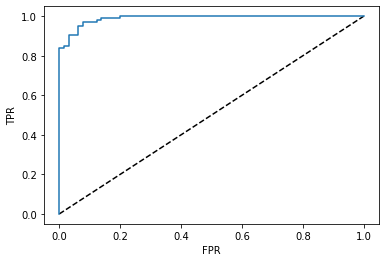

In [60]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [61]:
from sklearn.metrics import roc_auc_score

In [62]:
roc_auc_score(y_test,y_p_proba[:,1])

0.9894049346879537

In [63]:
from sklearn.model_selection import  GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [64]:
p_grid={'n_neighbors':range(1,50)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,p_grid,cv=5)
knn_cv.fit(x,y)
knn_cv.best_params_

{'n_neighbors': 13}

In [65]:
knn_cv.best_score_

0.9332401800962584

In [66]:
from scipy.stats import randint

In [67]:
randint(0,10).rvs(3)

array([8, 6, 8], dtype=int64)

In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
params={'max_depth':[None,3],'max_features':randint(1,9),'min_samples_leaf':randint(1,9)}
tree=DecisionTreeClassifier()
tree_cv=RandomizedSearchCV(tree,params,cv=5)
tree_cv.fit(x_train,y_train)
tree_cv.best_params_

{'max_depth': None, 'max_features': 2, 'min_samples_leaf': 1}

In [71]:
tree_cv.best_score_

0.9323101265822784

In [72]:
tree_cv.score(x_test,y_test)

0.9122807017543859

In [73]:
params={'max_depth':[None,3],'max_features':randint(1,9),'min_samples_leaf':randint(1,9)}
tree=DecisionTreeClassifier()
tree_cv=RandomizedSearchCV(tree,params,cv=10)
tree_cv.fit(x_train,y_train)
tree_cv.best_params_

{'max_depth': None, 'max_features': 5, 'min_samples_leaf': 5}

In [74]:
tree_cv.best_params_

{'max_depth': None, 'max_features': 5, 'min_samples_leaf': 5}

In [75]:
tree_cv.best_score_

0.9246153846153847

In [76]:
tree_cv.score(x_test,y_test)

0.9298245614035088

In [91]:
np.any(np.isnan(x_train))

False

In [116]:
from sklearn.naive_bayes import GaussianNB

In [117]:
gnb=GaussianNB()

In [118]:
gnb.fit(x_train,y_train)

GaussianNB()

In [120]:
y_p_gnb=gnb.predict(x_test)
gnb.score(x_test,y_test)

0.9649122807017544

In [109]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import scale

In [113]:
x_train1=scale(x_train)
y_train1=scale(y_train)
x_test1=scale(x_test)
y_test1=scale(y_test)

In [115]:
mlp=MLPRegressor(activation='identity',solver='sgd',alpha=0.0001,learning_rate_init=0.001,max_iter=500,early_stopping=True)
#mlp=MLPRegressor(alpha=0.0001,max_iter=500,early_stopping=True,learning_rate_init=0.001)
mlp.fit(x_train1,y_train1)
mlp.score(x_test1,y_test1)

0.6795951009565977